In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, classification_report
from sklearn import preprocessing

# Preprocessing

In [ ]:
data = pd.read_csv('https://bitbucket.org/silverxlibra/music-mental-health/downloads/mxmh_survey_results.csv')

In [ ]:
data.shape

(736, 33)

In [ ]:
data.head(15)

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
5,8/27/2022 21:56:50,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,...,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,I understand.
6,8/27/2022 22:00:29,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,...,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,I understand.
7,8/27/2022 22:18:59,21.0,Spotify,1.0,Yes,No,No,K pop,Yes,Yes,...,Sometimes,Rarely,Never,Rarely,5.0,3.0,5.0,3.0,Improve,I understand.
8,8/27/2022 22:33:05,19.0,Spotify,6.0,Yes,No,No,Rock,No,No,...,Never,Never,Very frequently,Never,2.0,0.0,0.0,0.0,Improve,I understand.
9,8/27/2022 22:44:03,18.0,I do not use a streaming service.,1.0,Yes,No,No,R&B,Yes,Yes,...,Sometimes,Rarely,Sometimes,Sometimes,2.0,2.0,5.0,1.0,Improve,I understand.


In [ ]:
data.columns

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions'],
      dtype='object')

In [ ]:
data["Music effects"].unique() #labels

array([nan, 'No effect', 'Improve', 'Worsen'], dtype=object)

In [ ]:
data.isnull().values.any()

True

In [ ]:
data.isnull().sum() #what has missing values, to decide what to do with

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

## Data Cleaning

Drop NULL or replace?
*   Looks like dropping nulls will suffice. Compared to the amount of data entries, dropping shouldn't be a concern here [except BPM]

Dropping columns?

*   BPM is not a column we are intending to use, so we can drop. (it also has the most nulls)
* Perhaps drop Timestamp as well? Not sure how necessary it is for us.



In [ ]:
#See nulls across the dataset
data.isna().sum()

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

In [ ]:
#Drop nulls
clean_data = data.dropna()

In [ ]:
len(clean_data)

616

In [ ]:
#verify nulls are gone
clean_data.isna().sum()

Timestamp                       0
Age                             0
Primary streaming service       0
Hours per day                   0
While working                   0
Instrumentalist                 0
Composer                        0
Fav genre                       0
Exploratory                     0
Foreign languages               0
BPM                             0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia      

In [ ]:
#drop unneccsary columns
clean_data = clean_data.drop(columns=['Timestamp', 'Composer','BPM','Permissions'])

In [ ]:
#verify columns are dropped
clean_data.head(2)

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Fav genre,Exploratory,Foreign languages,Frequency [Classical],Frequency [Country],...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
2,18.0,Spotify,4.0,No,No,Video game music,No,Yes,Never,Never,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,61.0,YouTube Music,2.5,Yes,No,Jazz,Yes,Yes,Sometimes,Never,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve


In [ ]:
# Encode our categorical variables into numeric values

encoded_data = pd.DataFrame()

encoder = preprocessing.LabelEncoder()

for column in clean_data.select_dtypes(include='object'):
    encoded_data[column] = encoder.fit_transform(clean_data[column])

encoded_data.head()


,Primary streaming service,While working,Instrumentalist,Fav genre,Exploratory,Foreign languages,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],...,Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Music effects
0,4,0,0,15,0,1,0,0,3,0,...,3,0,2,2,1,0,1,1,3,1
1,5,1,0,6,1,1,2,0,0,1,...,2,3,2,0,2,2,0,0,0,0
2,4,1,0,12,1,0,0,0,1,0,...,3,2,2,0,2,3,3,0,1,0
3,4,1,1,6,1,1,1,2,0,0,...,3,1,3,1,3,3,3,3,0,0
4,5,1,1,15,1,1,2,0,1,2,...,0,1,1,1,1,1,0,0,2,0


In [ ]:
encoded_data.max()

Primary streaming service        5
While working                    1
Instrumentalist                  1
Fav genre                       15
Exploratory                      1
Foreign languages                1
Frequency [Classical]            3
Frequency [Country]              3
Frequency [EDM]                  3
Frequency [Folk]                 3
Frequency [Gospel]               3
Frequency [Hip hop]              3
Frequency [Jazz]                 3
Frequency [K pop]                3
Frequency [Latin]                3
Frequency [Lofi]                 3
Frequency [Metal]                3
Frequency [Pop]                  3
Frequency [R&B]                  3
Frequency [Rap]                  3
Frequency [Rock]                 3
Frequency [Video game music]     3
Music effects                    2
dtype: int64

In [ ]:
clean_data.head()

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Fav genre,Exploratory,Foreign languages,Frequency [Classical],Frequency [Country],...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
2,18.0,Spotify,4.0,No,No,Video game music,No,Yes,Never,Never,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,61.0,YouTube Music,2.5,Yes,No,Jazz,Yes,Yes,Sometimes,Never,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,18.0,Spotify,4.0,Yes,No,R&B,Yes,No,Never,Never,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve
5,18.0,Spotify,5.0,Yes,Yes,Jazz,Yes,Yes,Rarely,Sometimes,...,Very frequently,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve
6,18.0,YouTube Music,3.0,Yes,Yes,Video game music,Yes,Yes,Sometimes,Never,...,Rarely,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve


In [ ]:
clean_data['Frequency [Pop]'].unique()

array(['Rarely', 'Sometimes', 'Very frequently', 'Never'], dtype=object)

In [ ]:
encoded_data['Frequency [Pop]'].unique()

array([1, 2, 3, 0])

In [ ]:
print(f'Validate both datasets are consistent post encoder. \nClean dataset: {len(clean_data)} \nEncoded Dataset: {len(encoded_data)}')

Validate both datasets are consistent post encoder. 
Clean dataset: 616 
Encoded Dataset: 616


In [ ]:
#looks at max value of each column (i.e. 0-15) to make sure all categorical variables have been accounted for to their numerical counterpart
encoded_data.min(axis=0)

Primary streaming service       0
While working                   0
Instrumentalist                 0
Fav genre                       0
Exploratory                     0
Foreign languages               0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Music effects                   0
dtype: int64

In [ ]:
#one hot encoding for music genre columns
data = pd.get_dummies(data, columns = ['Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]',
                                       'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]',
                                       'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]',
                                       'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]',
                                       'Frequency [R&B]', 'Frequency [Rock]', 'Frequency [Video game music]'])

Docs For Recomender System Reference:
* YT Video: https://www.youtube.com/watch?v=G4MBc40rQ2k
* Geeksforgeeks(high level w/ implementation): https://www.geeksforgeeks.org/recommendation-system-in-python/
* Movie rec system: https://thecleverprogrammer.com/2020/05/20/data-science-project-movie-recommendation-system/
* high lvl implementation: https://365datascience.com/tutorials/how-to-build-recommendation-system-in-python/


# Multi-Class Classifier

*The following recommender system combines the previous two. It uses the predictions from each models as features for a new model that predicts the favorite genre. This new model considers both the age and the mental health conditions.*

In [ ]:
encoded_data.unique()

array([1, 0, 2])

In [ ]:
clean_data["Music effects"].unique()

array(['No effect', 'Improve', 'Worsen'], dtype=object)

1. Use SelectKBest with the ANOVA F-value scoring function to select the top K features that are most relevant to predicting the target variable.
2. Train a Decision Tree Classifier using the selected features and evaluate its performance.

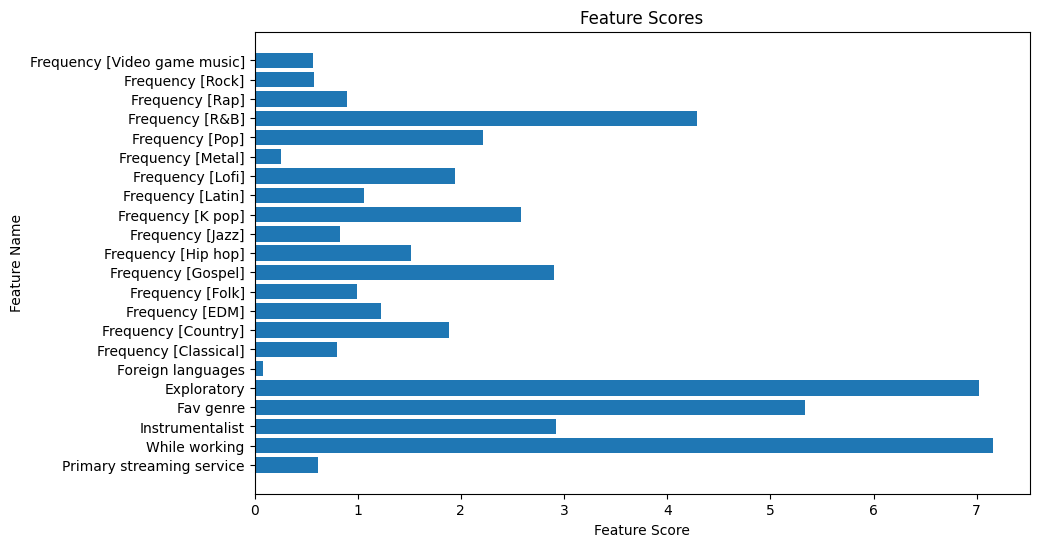

Selected Features: Index(['While working', 'Fav genre', 'Exploratory'], dtype='object')


In [ ]:
#combine models into new model
X = encoded_data.drop('Music effects', axis = 1) #all other features
y = encoded_data['Music effects'] #target variable

#feat selection using SelectKBest w/ ANOVA F-value
selector = SelectKBest(score_func = f_classif, k = 3) #select top 3 features
X_selected = selector.fit_transform(X, y)

#get feat scores
feat_scores = selector.scores_
#get feat names
feat_names = X.columns
#bar plot to visualize feat scores
plt.figure(figsize=(10, 6))
plt.barh(feat_names, feat_scores)
plt.xlabel('Feature Score')
plt.ylabel('Feature Name')
plt.title('Feature Scores')
plt.show()

#get indices of selected feats
selected_indices = selector.get_support(indices=True)
#get names of selected feats
selected_feats = X.columns[selected_indices]
print("Selected Features:", selected_feats)

In [ ]:
#split selected feats, target variable into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

#initialize decision tree classifier
clf = DecisionTreeClassifier()

#fit classifier to training data
clf.fit(X_train, y_train)

#predict labels of the test set
y_pred = clf.predict(X_test)

#evaluate classifier
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Print classification report
print(classification_report(y_test, y_pred, zero_division = 'warn'))

Accuracy: 0.7419354838709677
              precision    recall  f1-score   support

           0       0.76      0.96      0.85        95
           1       0.20      0.04      0.06        27
           2       0.00      0.00      0.00         2

    accuracy                           0.74       124
   macro avg       0.32      0.33      0.30       124
weighted avg       0.63      0.74      0.67       124



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
